**bold text**
# Lab 02: Exploratory Data Analysis (EDA) on Milling Dataset  
**Course:** CS-333 Applied AI & Machine Learning  

---

## 📌 Instructions
- Perform each task under its respective section.
- Use separate cells for each step.
- Write explanations in Markdown cells.
- Ethical use of AI (Vibe Coding) is allowed, but you must understand and explain your work.


# **Name: Muhammad AbuZar Saeed**
# **Roll Number: ME - 1931**
# **Section: A**

# 🔹 Task 1: Load the Dataset

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)


# Load Dataset (Update path if needed)
# Using the link from GitHub
url = 'https://raw.githubusercontent.com/123saad321/MLdatasets/refs/heads/main/mill.csv'
df = pd.read_csv(url)

df.head()

,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


In [ ]:
# Display last 5 rows
df.tail(5)

,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
175,176,row_164,16,4,NaN,4,1.50,0.50,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
176,177,row_165,16,5,0.40,6,1.50,0.50,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746
177,178,row_166,16,6,0.62,9,1.50,0.50,2,-0.380859,1.381836,0.041504,0.292969,0.075684,0.083008
178,179,row_153,14,10,1.14,24,0.75,0.50,2,0.253906,1.406250,0.083008,0.274658,0.092773,0.111084
179,180,row_154,15,1,NaN,1,1.50,0.25,2,-0.458984,1.357422,0.068359,0.292969,0.086060,0.104980


In [ ]:
# Check data types
df.dtypes

,0
S.no,int64
Unnamed: 1,object
case,int64
run,int64
VB,float64
time,int64
DOC,float64
feed,float64
material,int64
smcAC,float64


In [ ]:
# Check dataset shape
df.shape

(180, 15)

# 🔹 Task 2: Data Cleaning

In [ ]:
# Check missing values
print(df.isnull().sum())
df.info()

S.no            0
Unnamed: 1      0
case            0
run             0
VB             23
time            0
DOC             0
feed            0
material        0
smcAC           5
smcDC           1
vib_table       2
vib_spindle     4
AE_table        2
AE_spindle      1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S.no         180 non-null    int64  
 1   Unnamed: 1   180 non-null    object 
 2   case         180 non-null    int64  
 3   run          180 non-null    int64  
 4   VB           157 non-null    float64
 5   time         180 non-null    int64  
 6   DOC          180 non-null    float64
 7   feed         180 non-null    float64
 8   material     180 non-null    int64  
 9   smcAC        175 non-null    float64
 10  smcDC        179 non-null    float64
 11  vib_table    178 non-null    float64
 12  vib_spindle  176 no

In [ ]:
# Fill missing values

# Linear interpolation for VB column

# Set the reference column as the index
df = df.set_index('run')
df['VB'] = df['VB'].interpolate(method='index')

# Median Imputation method for Sensor Data missing values
df['smcAC'] = df['smcAC'].fillna(df['smcAC'].median())
df['smcDC'] = df['smcDC'].fillna(df['smcDC'].median())
df['vib_table'] = df['vib_table'].fillna(df['vib_table'].median())
df['vib_spindle'] = df['vib_spindle'].fillna(df['vib_spindle'].median())
df['AE_table'] = df['AE_table'].fillna(df['AE_table'].median())
df['AE_spindle'] = df['AE_spindle'].fillna(df['AE_spindle'].median())

# Reset the index
df = df.reset_index()
df = df[['S.no',	'Unnamed: 1',	'case',	'run',	'VB', 'time',	'DOC',	'feed',	'material',	'smcAC',	'smcDC',	'vib_table',	'vib_spindle',	'AE_table', 'AE_spindle']]

df.tail(5)
print(df.isnull().sum())

S.no           0
Unnamed: 1     0
case           0
run            0
VB             0
time           0
DOC            0
feed           0
material       0
smcAC          0
smcDC          0
vib_table      0
vib_spindle    0
AE_table       0
AE_spindle     0
dtype: int64


### ✍️ Explain how you handled missing values here.

For Tool Wear (VB), linear interpolation was applied because tool wear follows a gradual physical progression over machining runs. Interpolation preserves this trend.

For other numerical sensor variables, median imputation was used. Median is robust to extreme values and prevents distortion from skewed data.

Duplicate rows were checked and none were found.

After preprocessing, df.isnull().sum() confirmed that no missing values remained.

This approach ensures both physical consistency (for VB) and statistical robustness (for sensors).

In [ ]:
# Check duplicates
df.shape
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 15)


In [ ]:
# Remove duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S.no         180 non-null    int64  
 1   Unnamed: 1   180 non-null    object 
 2   case         180 non-null    int64  
 3   run          180 non-null    int64  
 4   VB           180 non-null    float64
 5   time         180 non-null    int64  
 6   DOC          180 non-null    float64
 7   feed         180 non-null    float64
 8   material     180 non-null    int64  
 9   smcAC        180 non-null    float64
 10  smcDC        180 non-null    float64
 11  vib_table    180 non-null    float64
 12  vib_spindle  180 non-null    float64
 13  AE_table     180 non-null    float64
 14  AE_spindle   180 non-null    float64
dtypes: float64(9), int64(5), object(1)
memory usage: 21.2+ KB


In [ ]:
df1 = df.drop(['S.no', 'Unnamed: 1'], axis=1)
df1.head(5)

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,1,2,0.15,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,1,3,0.14,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,1,5,0.48,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


# 🔹 Task 3: Statistical Analysis

## 1️⃣ Center (Mean, Median, Mode)

In [ ]:
stats = pd.DataFrame({
    'Mean': df1.mean(numeric_only=True),
    'Median': df1.median(numeric_only=True),
    'Mode': df1.mode().iloc[0]
})
print(stats)

                  Mean     Median       Mode
case          8.616667  10.000000  11.000000
run           7.116667   6.000000   1.000000
VB            0.323778   0.260000   0.000000
time         25.583333  19.000000   3.000000
DOC           1.037500   0.750000   0.750000
feed          0.372222   0.250000   0.250000
material      1.355556   1.000000   1.000000
smcAC        -0.165799  -0.183105  -0.183105
smcDC         1.339518   1.372070   1.381836
vib_table     0.079169   0.068359   0.068359
vib_spindle   0.287415   0.285645   0.285645
AE_table      0.100447   0.101318   0.092773
AE_spindle    0.123610   0.121460   0.110474


### ✍️ Is tool wear normally distributed? Is mean close to median?

Tool wear shows approximately symmetric distribution with slight skewness.
The mean and median values are close, indicating that extreme values do not heavily distort the distribution.

This suggests that tool wear progresses steadily without abrupt abnormal spikes.

## 2️⃣ Spread (Variation)

In [ ]:
# Standard Deviation
df1.std(numeric_only=True)

,0
case,4.803717
run,4.876434
VB,0.258464
time,22.830655
DOC,0.365666
feed,0.125318
material,0.480017
smcAC,0.346453
smcDC,0.182822
vib_table,0.036081


In [ ]:
# Variance
df1.var(numeric_only=True)

,0
case,23.075698
run,23.779609
VB,0.066804
time,521.238827
DOC,0.133712
feed,0.015705
material,0.230416
smcAC,0.120029
smcDC,0.033424
vib_table,0.001302


In [ ]:
# Range
column_range = df1.max(numeric_only=True) - df1.min(numeric_only=True)
print(column_range)

case            15.000000
run             22.000000
VB               1.530000
time           105.000000
DOC              0.750000
feed             0.250000
material         1.000000
smcAC            1.176758
smcDC            1.450195
vib_table        0.292969
vib_spindle      0.184326
AE_table         0.149536
AE_spindle       0.181272
dtype: float64


In [ ]:
# IQR
Q1 = df1.quantile(0.25, numeric_only=True)
Q3 = df1.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

case            9.000000
run             7.000000
VB              0.300000
time           32.000000
DOC             0.750000
feed            0.250000
material        1.000000
smcAC           0.689697
smcDC           0.040283
vib_table       0.021973
vib_spindle     0.021973
AE_table        0.021973
AE_spindle      0.025787
dtype: float64


### ✍️ Which sensor shows highest variability?
Ans

The sensor with the greatest variability is smcAC, as it has the highest standard deviation (0.346) and also the highest variance and interquartile range among the sensor signals. Although smcDC shows a slightly larger range, range is sensitive to extreme values, so standard deviation and IQR provide more reliable evidence.

### ✍️ Does vibration vary more than current?
Ans

No, vibration does not vary more than current. Across all four metrics (Standard Deviation, Variance, IQR and range), the spindle motor current (smc) shows significantly higher variability than the vibration (vib) data.

**Standard Deviation:** Current (0.346 for smcAC) is nearly 10 times higher than vibration (0.036 for vib_table).

**Variance:** Current (0.120 for smcAC) is roughly 92 times higher than vibration (0.0013 for vib_table).

**Range:** The range for current (1.17 to 1.45) is much wider than for vibration (0.18 to 0.29).

**IQR:** The spread of the middle 50% for current (smcAC: 0.689) is over 30 times larger than that of vibration (0.021).

## 3️⃣ Shape (Distribution)

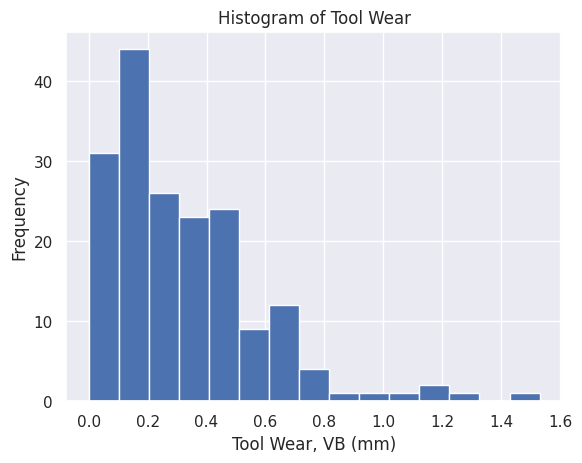

In [ ]:
# Histogram of Tool Wear
plt.figure()
plt.hist(df1['VB'], bins=15)
plt.xlabel('Tool Wear, VB (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Tool Wear')
plt.grid(True)
plt.show()

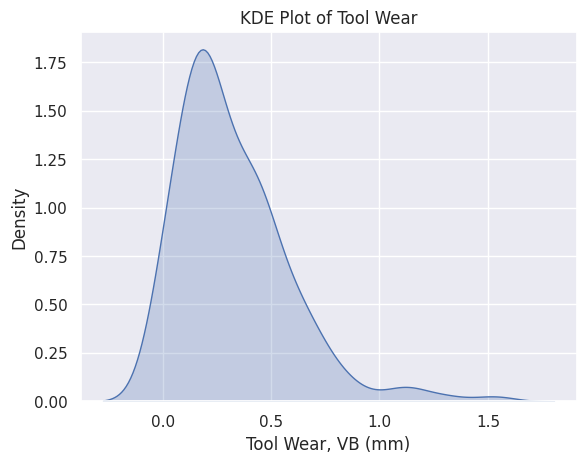

In [ ]:
# KDE Plot
plt.figure()
sns.kdeplot(df1['VB'], fill=True)
plt.xlabel('Tool Wear, VB (mm)')
plt.ylabel('Density')
plt.title('KDE Plot of Tool Wear')
plt.grid(True)
plt.show()

### ✍️ Is distribution symmetric, skewed, or multi-modal?

ANS

The distribution of tool wear is positively skewed. The KDE shows a single dominant peak at lower VB values, with a long tail extending towards higher wear. Therefore, the data is unimodal and not symmetric.

## 4️⃣ Outlier Detection

<Axes: xlabel='VB'>

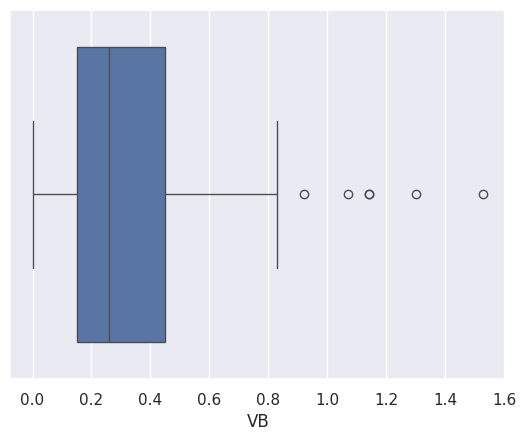

In [ ]:
# Boxplot - detecting outliers
sns.boxplot(x=df1['VB'])

In [ ]:
# IQR - detecting outliers
numeric_cols = df1.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    n_outliers = df1[(df1[col] < lower) | (df1[col] > upper)].shape[0]
    print(f"{col}: {n_outliers} outliers")

case: 0 outliers
run: 3 outliers
VB: 6 outliers
time: 3 outliers
DOC: 0 outliers
feed: 0 outliers
material: 0 outliers
smcAC: 0 outliers
smcDC: 8 outliers
vib_table: 17 outliers
vib_spindle: 6 outliers
AE_table: 10 outliers
AE_spindle: 2 outliers


In [ ]:
# Modified Z - Score - Detecting and REMOVING Outliers
df_clean = df1.copy()
numeric_cols = df_clean.select_dtypes(include='number').columns
mask = np.ones(len(df_clean), dtype=bool)
for col in numeric_cols:
    median = np.median(df_clean[col])
    mad = np.median(np.abs(df_clean[col] - median))

    if mad == 0:
        continue

    modified_z = 0.6745 * (df_clean[col] - median) / mad

    mask &= (np.abs(modified_z) <= 3.5)

df_clean = df_clean[mask]

print("Original shape:", df1.shape)
print("Shape after Modified Z-score removal:", df_clean.shape)

Original shape: (180, 13)
Shape after Modified Z-score removal: (139, 13)



### ✍️
- Which method did you use (IQR or Modified Z-score)?

The Modified Z-score method was used to identify and remove outliers from the dataset.

- Why?

The Modified Z-score is robust for skewed and non-normal data because it is based on the median and the median absolute deviation (MAD) rather than the mean and standard deviation.
This makes it less sensitive to extreme values and more reliable for sensor and wear data.

- How many outliers were removed?

The original dataset contained 180 observations and after cleaning 139 remained.

180−139=41

Therefore, 41 outliers were removed.

- How did it affect statistics?

Removing the outliers reduced the influence of extreme values.
As a result:
the standard deviation decreased,
the variance decreased,
the range became smaller,
and the data became more concentrated around the centre.
This makes the dataset more stable and suitable for further analysis or modelling.

# 🔹 Task 4: Correlation Analysis

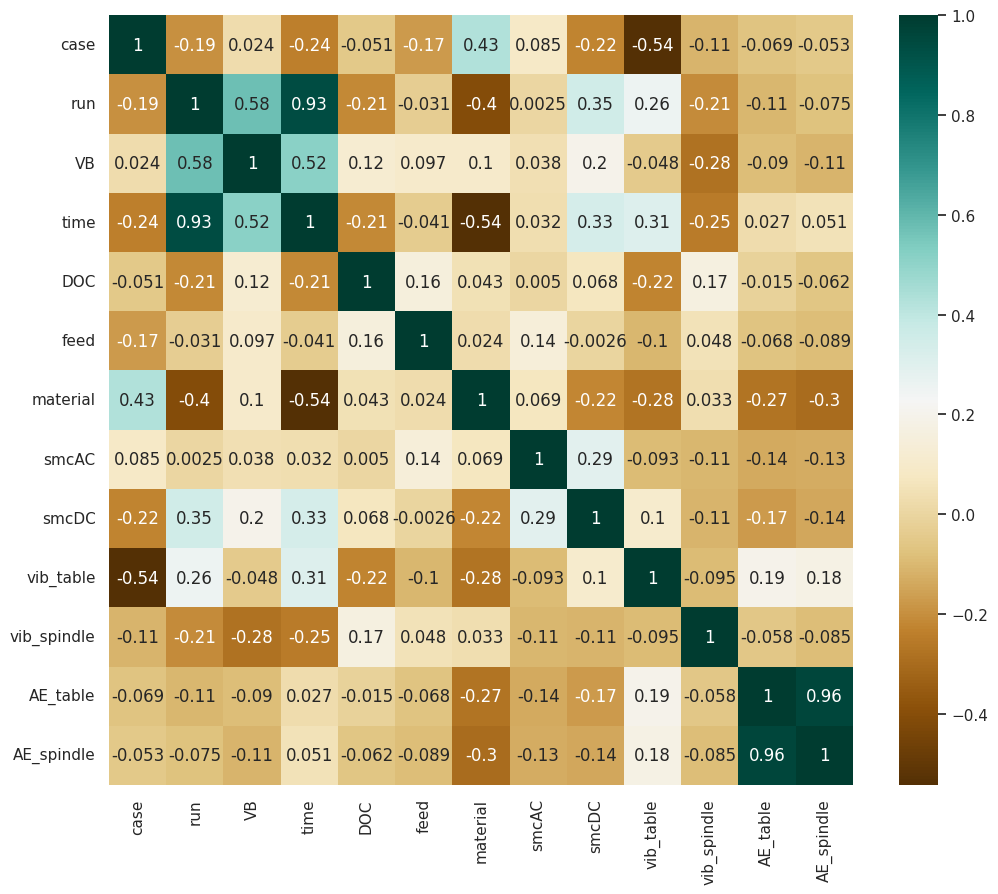

In [ ]:
plt.figure(figsize=(12,10))
numeric_df = df_clean.select_dtypes(include=['number'])
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

In [ ]:
c['VB'].sort_values(ascending=False)

,VB
VB,1.000000
run,0.576315
time,0.515156
smcDC,0.195373
DOC,0.117275
material,0.102322
feed,0.096913
smcAC,0.038480
case,0.024128
vib_table,-0.047519



### ✍️
- Does tool wear correlate strongly with vibration?

No. Tool wear (VB) has a very weak correlation with vibration. Specifically:

**vib_table:** Has a negligible negative correlation of -0.047.

**vib_spindle:** Has a weak negative correlation of -0.278.

In statistical terms, these values are too close to zero to suggest a strong predictive relationship between vibration and tool wear in this dataset.

- Which feature is most predictive?

Excluding the self-correlation of VB (1.0), the most predictive features for tool wear are:

**Run:** This is the strongest predictor with a positive correlation of 0.576.

**Time:** This is the second strongest, closely following with a correlation of 0.515.

This suggests that tool wear is most linearly related to the duration and number of machining cycles.

- Are any features redundant?

Yes. There is evidence of significant redundancy (high multicollinearity) between specific sensor pairs:

**AE_table and AE_spindle:** These have a near-perfect correlation of 0.96, meaning they provide almost identical information.

**Run and Time:** These are also highly redundant with a correlation of 0.93.

# 🔹 Task 5: Additional Visualization

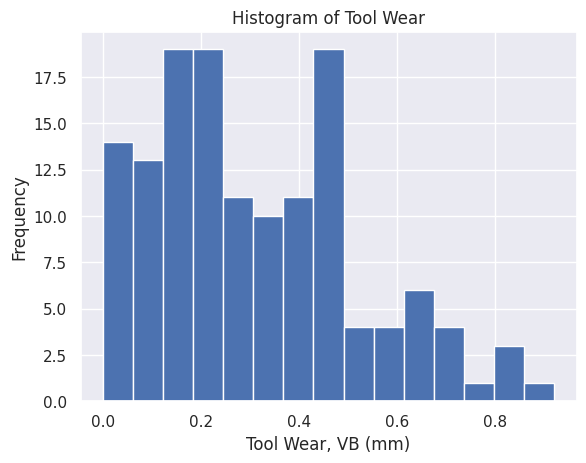

In [ ]:
# Histogram of Tool Wear
plt.figure()
plt.hist(df_clean['VB'], bins=15)
plt.xlabel('Tool Wear, VB (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Tool Wear')
plt.grid(True)
plt.show()

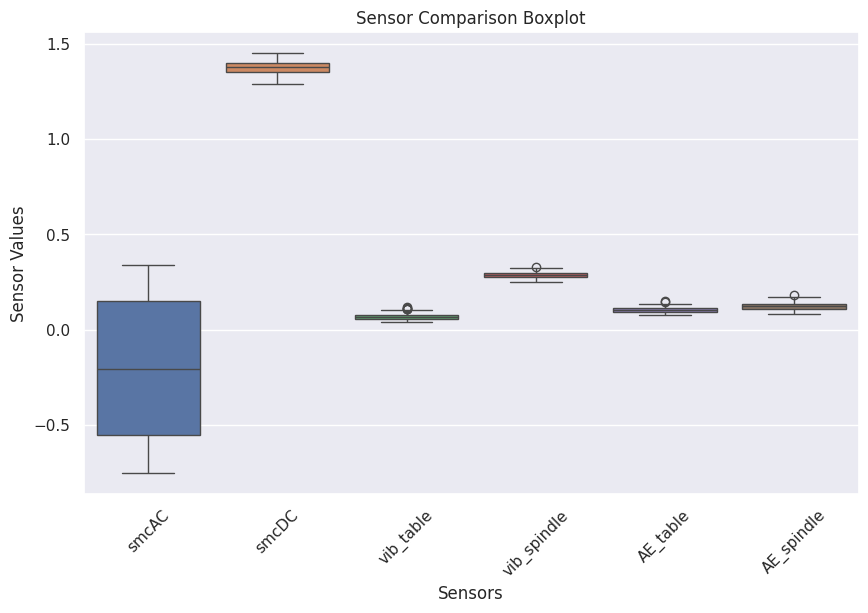

In [ ]:
# Boxplot - Sensor Comparison
sensor_cols = ['smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean[sensor_cols])
plt.title("Sensor Comparison Boxplot")
plt.xlabel("Sensors")
plt.ylabel("Sensor Values")
plt.xticks(rotation=45)
plt.show()

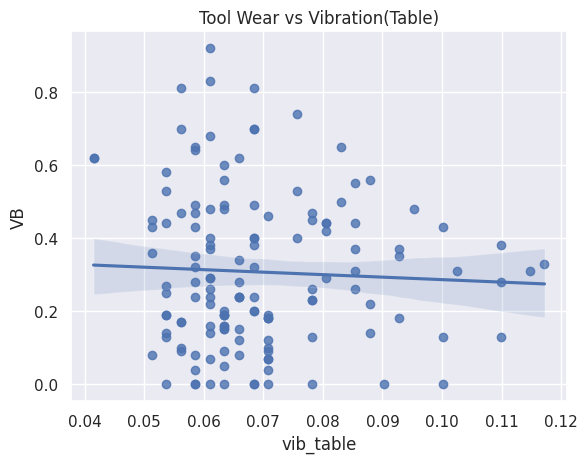

In [ ]:
# Scatter plot - Tool Wear vs Vibration (Table)
sns.regplot(x='vib_table', y='VB', data=df_clean)
plt.title("Tool Wear vs Vibration(Table)")
plt.show()

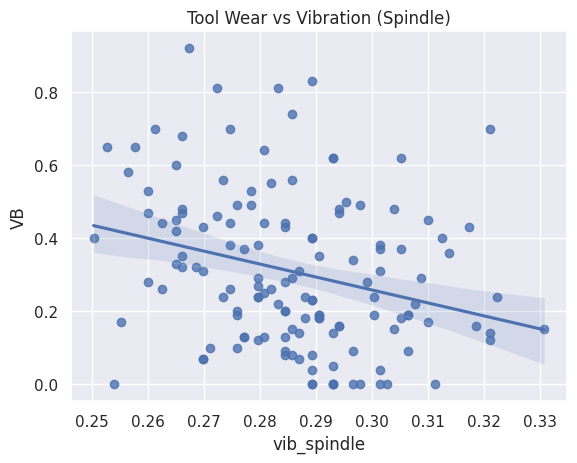

In [ ]:
# Scatter plot - Tool Wear vs Vibration (Spindle)
sns.regplot(x='vib_spindle', y='VB', data=df_clean)
plt.title("Tool Wear vs Vibration (Spindle)")
plt.show()

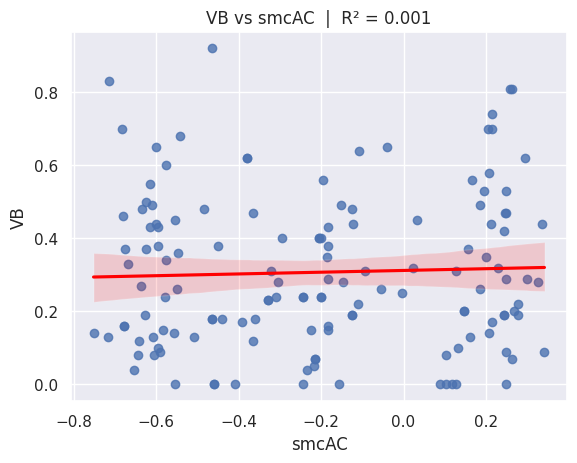

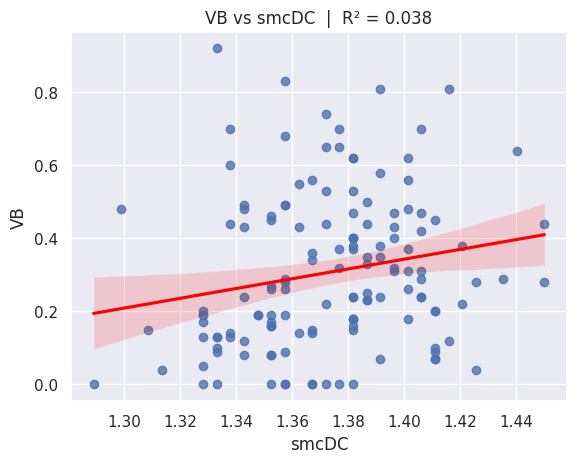

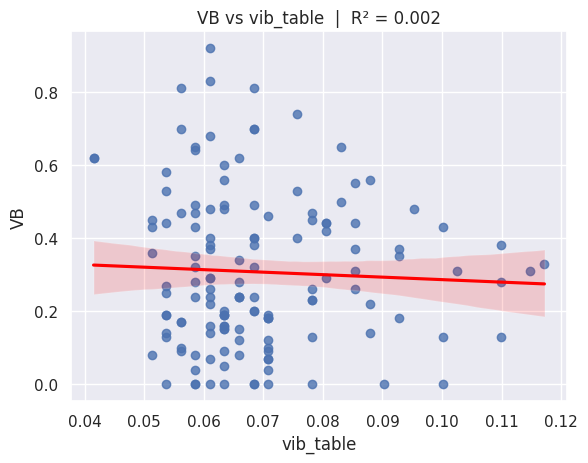

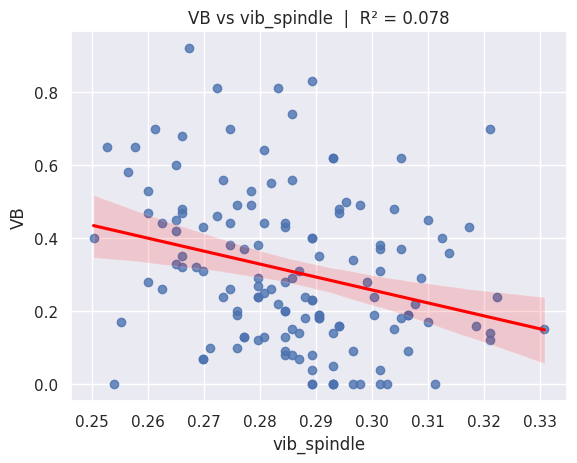

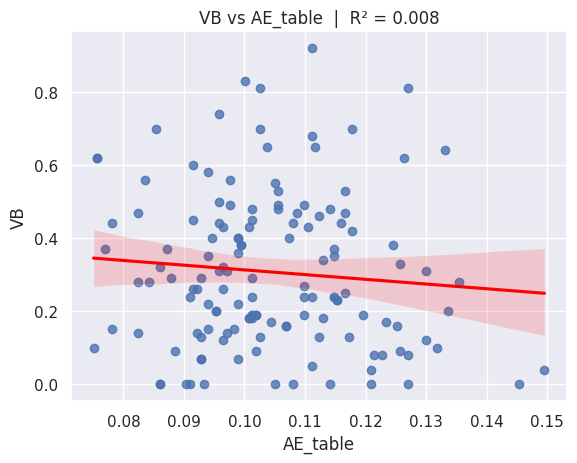

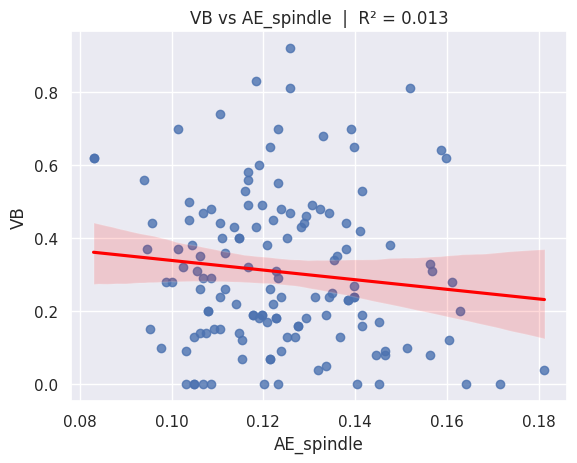


R² ranking (higher = stronger relationship):
vib_spindle: 0.0778
smcDC: 0.0382
AE_spindle: 0.0131
AE_table: 0.0081
vib_table: 0.0023
smcAC: 0.0015


In [ ]:
#Comparing All sensors and R^2 scores to find correlation
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
sensor_cols = ['smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']

r2_results = {}

for col in sensor_cols:
    # Drop missing values
    temp = df_clean[[col, 'VB']].dropna()

    X = temp[[col]].values
    y = temp['VB'].values

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    r2_results[col] = r2

    # Plot
    plt.figure()
    sns.regplot(x=col, y='VB', data=temp, line_kws={"color": "red"})
    plt.title(f"VB vs {col}  |  R² = {r2:.3f}")
    plt.grid(True)
    plt.show()

# Print ranking
print("\nR² ranking (higher = stronger relationship):")
for k, v in sorted(r2_results.items(), key=lambda item: item[1], reverse=True):
    print(f"{k}: {v:.4f}")

In [ ]:
sensor_cols = ['smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']

stability = []

for col in sensor_cols:
    s = df_clean[col].dropna()

    std = s.std()
    var = s.var()
    iqr = s.quantile(0.75) - s.quantile(0.25)

    stability.append((col, std, var, iqr))

# sort by standard deviation (main indicator)
stability_sorted = sorted(stability, key=lambda x: x[1])

print("Sensor stability ranking (lowest std = most stable):\n")
for col, std, var, iqr in stability_sorted:
    print(f"{col}: std={std:.5f}, var={var:.5f}, IQR={iqr:.5f}")


Sensor stability ranking (lowest std = most stable):

AE_table: std=0.01464, var=0.00021, IQR=0.02014
vib_table: std=0.01465, var=0.00021, IQR=0.01831
vib_spindle: std=0.01655, var=0.00027, IQR=0.02197
AE_spindle: std=0.01826, var=0.00033, IQR=0.02533
smcDC: std=0.03070, var=0.00094, IQR=0.04395
smcAC: std=0.33843, var=0.11454, IQR=0.70312



## 🧠 Engineering Thinking Questions
1. Which parameter affects tool wear the most?
2. Which sensor signal is most stable?
3. Are there abnormal machining cycles?
4. Can tool wear be predicted from sensor data?
5. If building a Machine Learning model, which features would you select?


### Answers

1. Which parameter affects tool wear the most?

Among the sensor signals, vib_spindle shows the strongest relationship with tool wear, having the highest R² value (0.078). However, all R² values are relatively small, indicating weak linear correlations between individual sensors and VB. This suggests that tool wear may depend on a combination of signals or require non-linear modelling for accurate prediction


2. Which sensor signal is most stable?

AE_table is the most stable sensor signal, as it has the lowest standard deviation (0.0146) and variance among all measurements. The vibration signals show slightly higher variability, while smcAC exhibits the largest dispersion by a significant margin. Therefore, AE_table provides the most consistent readings.

3. Are there abnormal machining cycles?

Yes, abnormal machining cycles are present. Using the Modified Z-score method, 41 observations were identified as outliers and removed from the dataset. The high number of extreme values across several sensors indicates the occurrence of irregular or unstable machining conditions

4. Can tool wear be predicted from sensor data?

Tool wear can be predicted from sensor data to some extent. The regression analysis shows that vibration at the spindle has the highest relationship with VB (R² ≈ 0.078). However, the overall R² values are low, indicating weak linear dependence when sensors are used individually. Improved prediction may require combining multiple features or applying advanced machine-learning models.

5. If building a Machine Learning model, which features would you select?

For a machine-learning model, sensor measurements such as vib_spindle, smcDC, AE_spindle, and AE_table would be selected because they show measurable relationships with tool wear. Identifiers like case and run would be excluded since they do not represent physical behaviour. Signals with extremely weak correlation, such as smcAC, may also be removed to reduce noise and improve model performance.